## In this note book Standardize the scores

## Data Import and Matrix Split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

### Fill in gender in R1 and R2 matrix

In [2]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_R1_R2_on_0702clean_data.csv')

In [3]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_0702.csv')
Y1 = df.loc[:, 'UniqueID':'t39_combo']
Y1['Gender'] = df['Gender']

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,UniqueID,a1_combo,a2_combo,a3_combo,a4_combo,a5_combo,a6_combo,b7_combo,...,Age,Date,Gender,GRYD_Zone,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_White,Ethnicity_Other,RiskFactor
0,0,851,3538.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,...,13.0,2009-11-12,1.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0
1,3,869,3552.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,...,14.0,2009-11-16,2.0,5.0,0.0,0.0,1.0,0.0,0.0,7.0
2,6,892,3569.0,3.0,5.0,4.0,1.0,4.0,2.0,5.0,...,13.0,2009-11-17,1.0,17.0,0.0,0.0,1.0,0.0,0.0,7.0
3,9,895,3570.0,3.0,4.0,2.0,3.0,4.0,3.0,3.0,...,10.0,2009-11-18,1.0,17.0,1.0,0.0,0.0,0.0,0.0,5.0
4,12,919,3586.0,4.0,4.0,5.0,5.0,4.0,1.0,3.0,...,11.0,2009-11-19,2.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0


In [5]:
df = pd.read_csv('Intersection_Y1R1R2_0702R1_0702.csv')
R1 = df.loc[:, 'UniqueID':'t39_combo']
R1['Gender'] = df['Gender']

In [6]:
df = pd.read_csv('Intersection_Y1R1R2_0702R2_0702.csv')
R2 = df.loc[:, 'UniqueID':'t39_combo']
R2['Gender'] = df['Gender']

In [7]:
# change all nan gender values in R1 according to their values in Y1

for index in R1.index:
    if pd.isnull(R1.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R1.loc[index, 'Gender'] = gender

In [8]:
# change all nan gender values in R2 according to their values in Y1

for index in R2.index:
    if pd.isnull(R2.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R2.loc[index, 'Gender'] = gender

In [9]:
Gender_Incos = []
for index in Y1.index:
    if (Y1.loc[index, 'Gender'] != R1.loc[index, 'Gender']) or (R1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) or (Y1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) :
        Gender_Incos.append(Y1.loc[index, 'UniqueID'])

### Drop IDs with Nan values

In [10]:
#indices
columns = Y1.columns.tolist()
columns = columns[:-1]

#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(Y1[Y1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list = list(my_set)
unique_index_list

[]

In [11]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R1[R1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list1 = list(my_set)
unique_index_list1

[512, 770, 169, 624, 402, 56, 1087, 927]

In [12]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R2[R2[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list2 = list(my_set)
unique_index_list2

[1297, 182, 347, 446, 763]

In [13]:
#make list of UniqueIDs associated with these NaN values
ID_list = []
for i in unique_index_list1:
    ID_list.append(R1.loc[i,'UniqueID'])
ID_list

[14334.0, 17710.0, 11189.0, 16486.0, 12668.0, 4960.0, 25920.0, 22418.0]

In [14]:
#make list of UniqueIDs associated with these NaN values
for i in unique_index_list2:
    ID_list.append(R2.loc[i,'UniqueID'])
ID_list

[14334.0,
 17710.0,
 11189.0,
 16486.0,
 12668.0,
 4960.0,
 25920.0,
 22418.0,
 32402.0,
 11205.0,
 12560.0,
 13876.0,
 17696.0]

In [15]:
ID_list.extend(Gender_Incos)

In [16]:
ID_list

[14334.0,
 17710.0,
 11189.0,
 16486.0,
 12668.0,
 4960.0,
 25920.0,
 22418.0,
 32402.0,
 11205.0,
 12560.0,
 13876.0,
 17696.0,
 5957.0,
 6183.0,
 11177.0,
 11195.0,
 11218.0,
 11394.0,
 11419.0,
 11752.0,
 12926.0,
 12952.0,
 13071.0,
 17040.0,
 17651.0,
 17851.0,
 17959.0,
 21493.0,
 22624.0,
 28767.0,
 29298.0,
 29415.0,
 29542.0,
 29704.0,
 31457.0,
 31947.0,
 32298.0,
 33616.0,
 34230.0,
 41607.0,
 43947.0]

In [17]:
#drop these IDs from the data
for id in ID_list:
    Y1 = Y1[Y1['UniqueID']!=id]

In [18]:
#drop these IDs from the data
for id in ID_list:
    R1 = R1[R1['UniqueID']!=id]

In [19]:
#drop these IDs from the data
for id in ID_list:
    R2 = R2[R2['UniqueID']!=id]

## Add gender control indicator in the input matrix

In [20]:
Y1['Gender1'] = 0
Y1['Gender2'] = 0
for i in Y1.index:
    if Y1.loc[i,'Gender'] == 1:
        Y1.set_value(i,'Gender1',1) 
        Y1.set_value(i,'Gender2',0) 
    else:
        Y1.set_value(i,'Gender1',0) 
        Y1.set_value(i,'Gender2',1) 

In [21]:
R1['Gender1'] = 0
R1['Gender2'] = 0
for i in R1.index:
    if R1.loc[i,'Gender'] == 1:
        R1.set_value(i,'Gender1',1) 
        R1.set_value(i,'Gender2',0) 
    else:
        R1.set_value(i,'Gender1',0) 
        R1.set_value(i,'Gender2',1) 

In [22]:
R2['Gender1'] = 0
R2['Gender2'] = 0
for i in R2.index:
    if R2.loc[i,'Gender'] == 1:
        R2.set_value(i,'Gender1',1) 
        R2.set_value(i,'Gender2',0) 
    else:
        R2.set_value(i,'Gender1',0) 
        R2.set_value(i,'Gender2',1) 

In [23]:
R2.head()

,UniqueID,a1_combo,a2_combo,a3_combo,a4_combo,a5_combo,a6_combo,b7_combo,b8_combo,b9_combo,...,h33_combo,h34_combo,h35_combo,h36_combo,h37_combo,t38_combo,t39_combo,Gender,Gender1,Gender2
0,3538.0,2.0,4.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,1,0
1,3552.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,...,2.0,1.0,1.0,3.0,1.0,0.0,0.0,2.0,0,1
2,3569.0,4.0,4.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,...,4.0,3.0,2.0,4.0,2.0,0.0,1.0,1.0,1,0
3,3570.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1,0
4,3586.0,4.0,4.0,4.0,1.0,4.0,1.0,3.0,4.0,4.0,...,1.0,1.0,2.0,2.0,4.0,0.0,0.0,2.0,0,1


In [24]:
Y1 = Y1.drop('UniqueID',axis = 1)
Y1 = Y1.drop('Gender',axis = 1)

In [25]:
Y1 = Y1.transpose()
Y1.shape

(41, 1634)

In [26]:
R1 = R1.drop('UniqueID',axis = 1)
R1 = R1.drop('Gender',axis = 1)
R1 = R1.transpose()

In [27]:
R2 = R2.drop('UniqueID',axis = 1)
R2 = R2.drop('Gender',axis = 1)
R2 = R2.transpose()

## Standardize all responses to (0,1)

In [28]:
for i in range(1634):
    Y1.iloc[37,i]=Y1.iloc[37,i]+1
    Y1.iloc[38,i]=Y1.iloc[38,i]+1
    R1.iloc[37,i]=R1.iloc[37,i]+1
    R1.iloc[38,i]=R1.iloc[38,i]+1
    R2.iloc[37,i]=R2.iloc[37,i]+1
    R2.iloc[38,i]=R2.iloc[38,i]+1

In [29]:
newlist=[]
for i in range(9):
    newlist.append(i)
for i in range(16,39):
    newlist.append(i)

In [30]:
for i in newlist:
    for j in range (1634):
        Y1.iloc[i,j]=(Y1.iloc[i,j]-1)/4
        R1.iloc[i,j]=(R1.iloc[i,j]-1)/4
        R2.iloc[i,j]=(R2.iloc[i,j]-1)/4

In [31]:
Y1_r = Y1[0:39]

In [32]:
R1_r = R1[0:39]

In [33]:
R2_r = R2[0:39]

In [34]:
Y1.shape

(41, 1634)

In [35]:
R1.shape

(41, 1634)

In [36]:
R2.shape

(41, 1634)

In [37]:
Y1.head()

,0,1,2,3,4,5,6,7,8,9,...,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674
a1_combo,0.50,0.50,0.50,0.50,0.75,0.50,0.75,0.50,0.25,0.75,...,1.00,0.75,1.00,0.75,0.75,0.50,1.0,1.00,1.00,0.50
a2_combo,0.50,0.75,1.00,0.75,0.75,0.75,0.50,1.00,0.75,1.00,...,1.00,1.00,1.00,0.50,1.00,0.50,1.0,1.00,1.00,0.50
a3_combo,0.75,0.75,0.75,0.25,1.00,0.75,1.00,0.50,0.75,1.00,...,1.00,0.75,0.75,1.00,0.50,0.50,1.0,1.00,0.75,0.50
a4_combo,0.75,0.50,0.00,0.50,1.00,0.50,0.50,0.00,0.25,0.50,...,0.75,0.50,0.50,0.75,0.00,0.50,0.0,0.75,0.50,0.25
a5_combo,0.50,0.75,0.75,0.75,0.75,0.50,0.50,0.75,0.50,1.00,...,1.00,1.00,0.75,1.00,0.75,0.75,1.0,1.00,1.00,0.75


## DMDc for Gender

### Y1 to R1

In [38]:
#Define the dimension parameters for later code

XwC = 41
X = 39
C = 2

In [39]:
#SVD for the Omega matrices(Combination of the original X-input matrix and control factors)

U_Y1,Sig_Y1,V_Y1=np.linalg.svd(Y1, full_matrices=False)    
V_Y1_T=V_Y1.conjugate().transpose()
Sig_inv_Y1=np.zeros((XwC, XwC))
for i in range(XwC):
    for j in range(XwC):
        if i==j:
            Sig_inv_Y1[i][j]=1/Sig_Y1[i]

In [40]:
#Splitting U matrixes to one include only information of responses and another one with control factors

U_Y1_Q = U_Y1[:X,:]
U_Y1_Q_T = U_Y1_Q.conjugate().transpose()
U_Y1_G = U_Y1[X:XwC,:]
U_Y1_G_T = U_Y1_G.conjugate().transpose()

In [41]:
#SVD for the X' matrix(the next time input matrix of only questions)

U_R1_r,Sig_R1_r,V_R1_r=np.linalg.svd(R1_r, full_matrices=False)
U_R1_r_T = U_R1_r.conjugate().transpose()
V_R1_r_T=V_R1_r.conjugate().transpose()
Sig_inv_R1_r=np.zeros((X, X))
for i in range(X):
    for j in range(X):
        if i==j:
            Sig_inv_R1_r[i][j]=1/Sig_R1_r[i]

In [42]:
U_Y1_Q.shape

(39, 41)

In [68]:
#Calculate the transformation A matrix (dimension X*X)

A_step1=np.dot(U_R1_r_T,R1_r)
A_step2=np.dot(A_step1,V_Y1_T)
A_step3=np.dot(A_step2,Sig_inv_Y1)
A_step4=np.dot(A_step3,U_Y1_Q_T)
A_Y1_R1 = np.dot(A_step4,U_R1_r)
A_Y1_R1

array([[ 4.52672462e-01,  5.72676464e-03, -1.06530581e-01, ...,
        -2.26069079e-01, -2.20144170e-01,  2.64752568e-01],
       [-2.42234154e-02,  3.32274242e-01, -1.42565364e-03, ...,
        -1.02549172e-01, -1.46361721e-01, -5.22331806e-03],
       [-3.93245662e-02, -3.70189905e-02,  3.15222867e-01, ...,
         8.95318266e-02, -9.39161714e-02, -1.10117833e-02],
       ...,
       [ 4.59201947e-03,  1.26015076e-03, -1.45705055e-03, ...,
         1.24718156e-01,  3.07997303e-02,  2.18681016e-03],
       [ 6.96791402e-03, -5.27167514e-03,  6.41111642e-03, ...,
        -2.34239796e-02,  9.46975357e-02,  7.08990006e-03],
       [ 1.27566787e-02,  2.44847158e-04,  1.19193923e-03, ...,
         3.48110882e-03,  4.63010239e-02,  8.93732025e-02]])

In [44]:
#Calculate the transformation B matrix

B_Y1_R1=np.dot(A_step3,U_Y1_G_T)
B_Y1_R1.shape

(39, 2)

In [45]:
B_Y1_R1

array([[-1.10605890e+00, -1.15788785e+00],
       [-1.01052405e-01, -1.42313021e-01],
       [-1.36309892e-01, -2.28687386e-01],
       [-3.38496693e-02, -2.35534249e-02],
       [-1.43257341e-01, -1.17558624e-01],
       [-3.14723143e-01, -3.08857110e-01],
       [ 5.03217218e-02,  4.35952054e-02],
       [-1.22214712e-02, -7.09645597e-03],
       [-2.45010653e-02,  1.00255856e-01],
       [ 1.08297564e-01,  1.07753851e-01],
       [-7.01286708e-03,  3.69768170e-02],
       [-6.17582439e-04, -2.54851110e-02],
       [-1.05003735e-03, -1.33487695e-02],
       [ 9.59333470e-02,  1.10596350e-01],
       [ 4.00433492e-02,  6.87234535e-03],
       [ 6.52852180e-03,  1.57781002e-03],
       [-5.99186545e-02, -6.60767833e-02],
       [-1.59753660e-02, -4.38440902e-02],
       [-2.21985913e-02, -2.80165136e-02],
       [ 2.15421950e-02, -2.35702822e-02],
       [-9.20646898e-02, -8.02216964e-02],
       [ 5.47643656e-02,  5.55643209e-02],
       [-3.75610782e-02, -3.19849336e-02],
       [ 3.

In [46]:
values_Y1, vectors_Y1 = np.linalg.eig(A_Y1_R1)

In [47]:
values_Y1

array([0.54456631+0.02184127j, 0.54456631-0.02184127j,
       0.4542087 +0.j        , 0.37720675+0.j        ,
       0.01621462+0.04264789j, 0.01621462-0.04264789j,
       0.05399827+0.09315761j, 0.05399827-0.09315761j,
       0.08957505+0.11690403j, 0.08957505-0.11690403j,
       0.2648191 +0.10337003j, 0.2648191 -0.10337003j,
       0.31603183+0.04091621j, 0.31603183-0.04091621j,
       0.32393455+0.j        , 0.29167294+0.05840064j,
       0.29167294-0.05840064j, 0.19844912+0.11366435j,
       0.19844912-0.11366435j, 0.03802952+0.00558992j,
       0.03802952-0.00558992j, 0.09052498+0.08696644j,
       0.09052498-0.08696644j, 0.27788733+0.j        ,
       0.23533954+0.06587556j, 0.23533954-0.06587556j,
       0.0720705 +0.j        , 0.09010548+0.05174524j,
       0.09010548-0.05174524j, 0.18338442+0.07189416j,
       0.18338442-0.07189416j, 0.20387403+0.02326781j,
       0.20387403-0.02326781j, 0.14261224+0.037484j  ,
       0.14261224-0.037484j  , 0.18709611+0.j        ,
       0.1

In [48]:
eiglog_Y1 = np.log(values_Y1)

In [49]:
lamphi_Y1=np.zeros(39)
for i in range (39):
    rep=vectors_Y1[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1[i])*norm
    lamphi_Y1[i]=val

### R1 to R2

In [50]:
#SVD for the Omega matrices(Combination of the original X-input matrix and control factors)

U_R1,Sig_R1,V_R1=np.linalg.svd(R1, full_matrices=False)    
V_R1_T=V_R1.conjugate().transpose()
Sig_inv_R1=np.zeros((XwC, XwC))
for i in range(XwC):
    for j in range(XwC):
        if i==j:
            Sig_inv_R1[i][j]=1/Sig_R1[i]

In [51]:
#Splitting U matrixes to one include only information of responses and another one with control factors

U_R1_Q = U_R1[:X,:]
U_R1_Q_T = U_R1_Q.conjugate().transpose()
U_R1_G = U_R1[X:XwC,:]
U_R1_G_T = U_R1_G.conjugate().transpose()

In [52]:
#SVD for the X' matrix(the next time input matrix of only questions)

U_R2_r,Sig_R2_r,V_R2_r=np.linalg.svd(R2_r, full_matrices=False)
U_R2_r_T = U_R2_r.conjugate().transpose()
V_R2_r_T=V_R2_r.conjugate().transpose()
Sig_inv_R2_r=np.zeros((X, X))
for i in range(X):
    for j in range(X):
        if i==j:
            Sig_inv_R2_r[i][j]=1/Sig_R2_r[i]

In [53]:
#Calculate the transformation A matrix (dimension X*X)

A_step1=np.dot(U_R2_r_T,R2_r)
A_step2=np.dot(A_step1,V_R1_T)
A_step3=np.dot(A_step2,Sig_inv_R1)
A_step4=np.dot(A_step3,U_R1_Q_T)
A_R1_R2 = np.dot(A_step4,U_R2_r)
A_R1_R2.shape

(39, 39)

In [54]:
#Calculate the transformation B matrix

B_R1_R2=np.dot(A_step3,U_R1_G_T)
B_R1_R2.shape

(39, 2)

In [55]:
values_R1, vectors_R1 = np.linalg.eig(A_R1_R2)

In [56]:
eiglog_R1 = np.log(values_R1)

In [57]:
lamphi_R1=np.zeros(39)
for i in range (39):
    rep=vectors_R1[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1[i])*norm
    lamphi_R1[i]=val

## Graphs

In [58]:
label=['a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'b7', 'b8',
       'b9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'de17', 'de18',
       'de19', 'de20', 'f21', 'f22', 'f23o',
       'f24', 'f25', 'f26', 'g27', 'g28',
       'g29', 'g30', 'g31', 'h32', 'h33',
       'h34', 'h35', 'h36', 'h37', 't38',
       't39']

### Y1 to R1

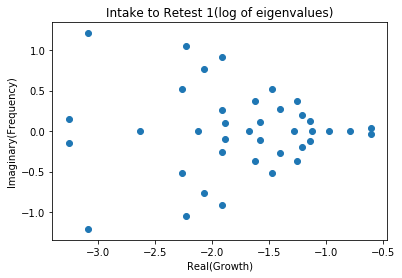

In [59]:
plt.scatter(eiglog_Y1.real,eiglog_Y1.imag)
plt.title('Intake to Retest 1(log of eigenvalues)') 
plt.xlabel('Real(Growth)')
plt.ylabel('Imaginary(Frequency)')
plt.show()

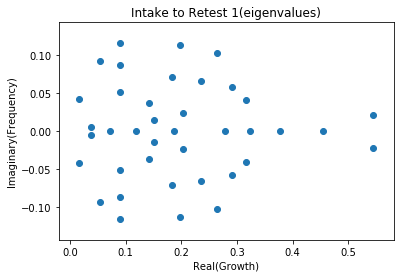

In [60]:
#plot real and imaginary parts of the eigenvalues
plt.scatter(values_Y1.real,values_Y1.imag)
plt.title('Intake to Retest 1(eigenvalues)') 
plt.xlabel('Real(Growth)')
plt.ylabel('Imaginary(Frequency)')
plt.show()

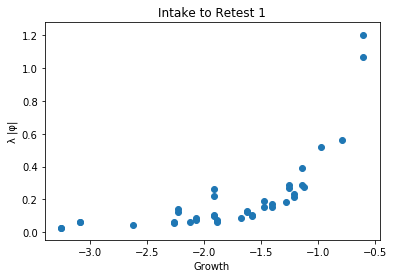

In [61]:
#plot of real part of log(eigenvalue) vs lambda*eigenvector
plt.scatter(eiglog_Y1.real,lamphi_Y1)
plt.title('Intake to Retest 1') 
plt.xlabel('Growth')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

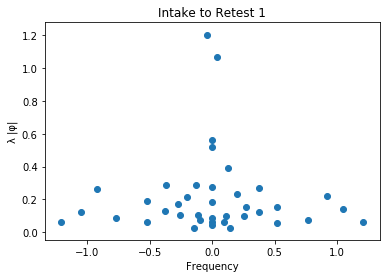

In [62]:
#plot of imaginary part of log(eigenvalue) vs lambda*eigenvector
plt.scatter(eiglog_Y1.imag,lamphi_Y1)
plt.title('Intake to Retest 1') 
plt.xlabel('Frequency')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

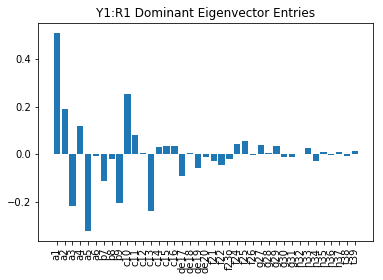

In [63]:
index=np.zeros(39)
weiabs=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs[j]=vectors_Y1[j,0].real
plt.title('Y1:R1 Dominant Eigenvector Entries') 
plt.xticks(np.arange(min(index), max(index)+1, 1.0), label, rotation='vertical')
plt.bar(index,weiabs)
plt.show()

### R1 to R2

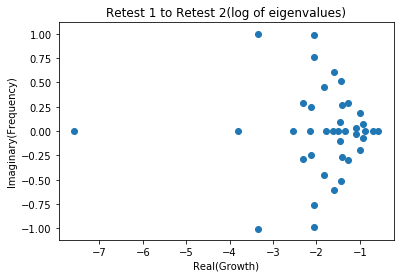

In [64]:
plt.scatter(eiglog_R1.real,eiglog_R1.imag)
plt.title('Retest 1 to Retest 2(log of eigenvalues)') 
plt.xlabel('Real(Growth)')
plt.ylabel('Imaginary(Frequency)')
plt.show()

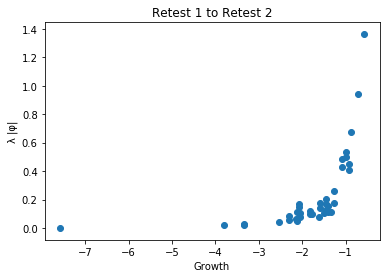

In [65]:
#plot of real part of log(eigenvalue) vs lambda*eigenvector
plt.scatter(eiglog_R1.real,lamphi_R1)
plt.title('Retest 1 to Retest 2') 
plt.xlabel('Growth')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

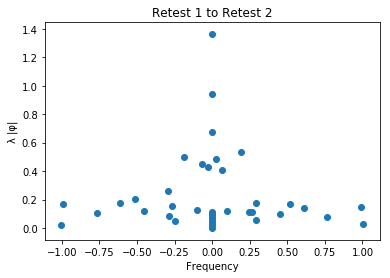

In [66]:
#plot of imaginary part of log(eigenvalue) vs lambda*eigenvector
plt.scatter(eiglog_R1.imag,lamphi_R1)
plt.title('Retest 1 to Retest 2') 
plt.xlabel('Frequency')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

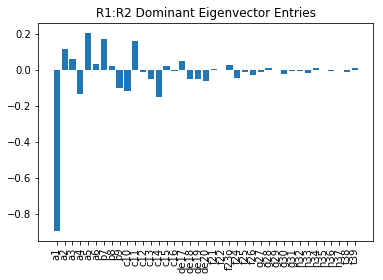

In [67]:
index=np.zeros(39)
weiabs=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs[j]=vectors_R1[j,0].real
plt.title('R1:R2 Dominant Eigenvector Entries') 
plt.xticks(np.arange(min(index), max(index)+1, 1.0), label, rotation='vertical')
plt.bar(index,weiabs)
plt.show()